In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the train data 

In [2]:
#As it is in excel format, we are using pd.read_excel
df_train = pd.read_excel(r"TrainData.xlsx")

In [3]:
pd.set_option('display.max_columns', None)  #Customizing the dataframe accordingly using set_option

In [4]:
#Checking the top 5 data of the dataset
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#Checking the information of the features and data present
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We can see that all the features, except Price, are of object datatypes and we need to convert them into numerical data before the model building process.

In [6]:
#Checking the shape of the dataset
df_train.shape

(10683, 11)

In [7]:
#Checking the unique values from Duration feature
df_train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
42h 5m       1
33h 20m      1
42h 45m      1
30h 10m      1
35h 35m      1
Name: Duration, Length: 368, dtype: int64

We can see that most of the flight travel time is 2hrs 50min and the minimum values are for the flights that are having a travel time above 30hrs.

In [8]:
#Checking for any missing data in the dataset
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Only 2 of the datas are missing and rest all datas are present completely. We can drop those missing data by using dropna()

In [9]:
#Dropping missing data
df_train.dropna(inplace = True)

In [10]:
df_train.isnull().sum()   #Checking the dataset after handling missing data

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Exploratory Data Analysis (EDA)

## Feature Engineering

### Handling Date_of_Journey feature

-> From description, we can see that Date_of_Journey is a object data type. Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

-> For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date**

**.dt.month method will extract only month of that date**

In [11]:
#Extracting the day and adding a new feature Journey_day
df_train['Journey_day'] = pd.to_datetime(df_train.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [12]:
#Extracting the month and adding a new feature Journey_month
df_train['Journey_month'] = pd.to_datetime(df_train['Date_of_Journey'], format = "%d/%m/%Y").dt.month

In [13]:
#Checking the updated dataset
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
#Since we have converted Date_of_Journey column into integers, we can drop the feature
df_train.drop(['Date_of_Journey'], axis = 1, inplace = True)

### Handling Dep_Time feature

Departure time is when a plane leaves the gate. In this feature, we will extract the hours and minutes values and add them to new features.

In [15]:
#Extracting the hours and adding them to Dep_hour feature
df_train['Dep_hour'] = pd.to_datetime(df_train["Dep_Time"]).dt.hour

In [16]:
#Extracting the minutes and adding them to Dep_min feature
df_train['Dep_min'] = pd.to_datetime(df_train['Dep_Time']).dt.minute

In [17]:
#Now we can drop Dep_Time feature
df_train.drop(['Dep_Time'], axis = 1, inplace = True)

In [18]:
#Checking the updated dataset
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


### Handling Arrival_Time feature

Arrival time is when the plane pulls up to the gate. We will extract the hours and minutes values and add them to new features.

In [19]:
#Extracting the hours and adding them to Arrival_hour feature
df_train['Arrival_hour'] = pd.to_datetime(df_train.Arrival_Time).dt.hour

In [20]:
#Extracting the minutes and adding them to Arrival_min feature
df_train['Arrival_min'] = pd.to_datetime(df_train.Arrival_Time).dt.minute

In [21]:
#Dropping Arrival_Time as it is of no use
df_train.drop(['Arrival_Time'], axis = 1, inplace = True)

In [22]:
#Checking the updated dataset
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### Handling Duration feature

Time taken by plane to reach destination is called Duration.

    Duration = Departure Time - Arrival Time

In [23]:
#Converting the Duration column into a list
duration = list(df_train['Duration'])

We need to extract the hours and minutes separately and append them into new features. For this, we can take a for loop and split them accordingly to the user needs and then appending them into new list with conditions and initializing them to new features.

In [24]:
#Taking a for loop with duration list length as the range
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    #Checking if duration contains only hours or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   #Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           #Adds 0 hour
            
#Taking empty lists
duration_hours = []
duration_mins = []

#Appending the extracted data to these empty lists in integer format
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    #Extract hours from duration 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   #Extracting only minutes from duration

In [25]:
#Adding duration_hours and duration_mins list to df_train dataframe
df_train['Duration_hours'] = duration_hours
df_train['Duration_mins'] = duration_mins

In [26]:
#Dropping the Duration column
df_train.drop(['Duration'], axis = 1, inplace = True)

In [27]:
#Checking the updated dataset
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case

**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [28]:
#Checking the value_counts() of Airline feature
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

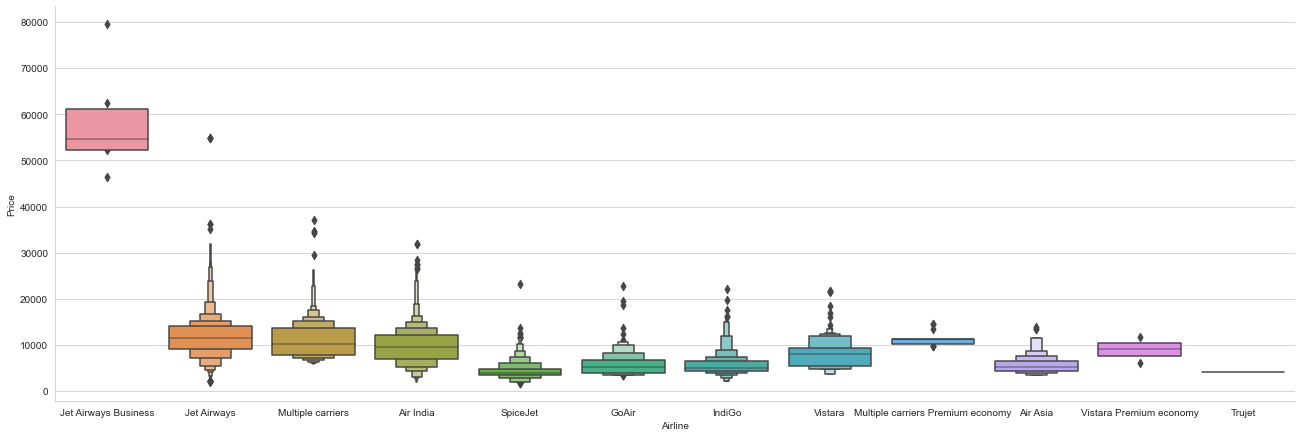

In [29]:
#Plotting Airline vs Price using catplot
sns.set_style('whitegrid')
sns.catplot(y="Price", x="Airline", data = df_train.sort_values("Price", ascending = False), kind="boxen", height=6, aspect=3)
plt.show()

-> From the graph we can see that Jet Airways Business have the highest Price.

-> Apart from the first Airline, almost all are having similar median.

-> We can also note that there are some outliers present in this dataset.

In [30]:
#As Airline is Nominal Categorical data, we will perform OneHotEncoding
Airline = df_train[['Airline']]  #Assigning to Airline 
Airline = pd.get_dummies(Airline, drop_first= True) #OneHotEncoding and drop_first=True for dropping 1st column after conversion
Airline.head()  #Checking the encoded data

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [31]:
#Checking the value_counts() of Source feature
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

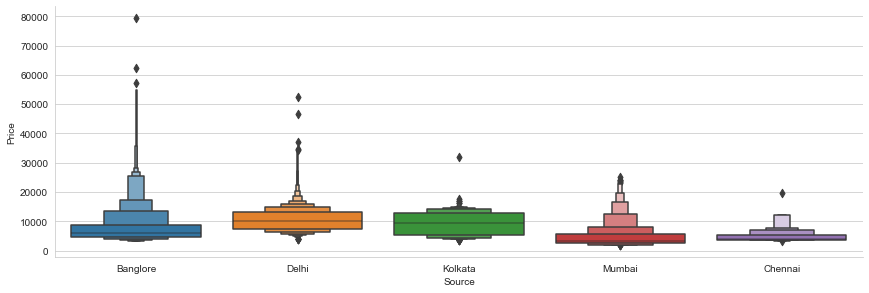

In [32]:
#Plotting Source vs Price
sns.catplot(y="Price", x="Source", data = df_train.sort_values("Price", ascending = False), kind="boxen", height=4, aspect=3)
plt.show()

-> Price is higher in Banglore and it is due to presence of outliers

In [33]:
#As Source is Nominal Categorical data, we will perform OneHotEncoding
Source = df_train[['Source']]   #Assigning to Source
Source = pd.get_dummies(Source, drop_first= True)   #OneHotEncoding and drop_first=True for dropping 1st column after conversion
Source.head() #Checking the encoded data

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
#Checking the value_counts() of Destination feature
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [35]:
#As Destination is Nominal Categorical data, we will perform OneHotEncoding
Destination = df_train[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True) 
Destination.head()  #Checking the encoded data

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [36]:
#Checking Route feature
df_train['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [37]:
#Checking Additional_Info feature
df_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [38]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

-> We can see that Total_Stops and Route feature has the similar data so that we can drop Route.

-> In Additional_Info, nearly 80% of the data has no info so that we can also drop this feature.

In [39]:
df_train.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [40]:
#As this is case of Ordinal Categorical type, we perform LabelEncoder 
#Here Values are assigned with corresponding keys
df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [41]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [42]:
#Concatenating the dataframes ---> df_train + Airline + Source + Destination into a single dataframe
dftrain = pd.concat([df_train, Airline, Source, Destination], axis = 1)

In [43]:
#Checking the dataset after concatenation
dftrain.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
#Dropping the columns
dftrain.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
dftrain.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
#Checking the dataset shape
dftrain.shape

(10682, 30)

# Importing the test data

Here, we will separately handle the test data without combining with the train data inorder to prevent data leakage as the model will know the information about test data if we do so. It can also cause data overfitting too.

In [46]:
#As it is in excel format, we are using pd.read_excel
df_test = pd.read_excel(r"TestData.xlsx")

In [47]:
#Checking the top 5 data in the dataset
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [48]:
#Data Preprocessing(Same process we followed for train data)

print("Test data Info")
print("-"*75)
print(df_test.info())

print()
print()

print("Null values :")
print("-"*75)
df_test.dropna(inplace = True)
print(df_test.isnull().sum())

#EDA

#Date_of_Journey
df_test['Journey_day'] = pd.to_datetime(df_test.Date_of_Journey, format = "%d/%m/%Y").dt.day
df_test['Journey_month'] = pd.to_datetime(df_test['Date_of_Journey'], format = "%d/%m/%Y").dt.month
df_test.drop(['Date_of_Journey'], axis = 1, inplace = True)

#Dep_Time
df_test['Dep_hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test.drop(['Dep_Time'], axis = 1, inplace = True)

#Arrival_Time
df_test['Arrival_hour'] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test['Arrival_min'] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(['Arrival_Time'], axis = 1, inplace = True)

#Duration
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
            
#Empty list            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
#Adding Duration column to test set
df_test['Duration_hours'] = duration_hours
df_test['Duration_mins'] = duration_mins
df_test.drop(['Duration'], axis = 1, inplace = True)

#Handling Categorical data using OneHotEncoder
print("Airline")
print("-"*75)
print(df_test['Airline'].value_counts())
Airline = pd.get_dummies(df_test['Airline'], drop_first= True)

print()

print("Source")
print("-"*75)
print(df_test['Source'].value_counts())
Source = pd.get_dummies(df_test['Source'], drop_first= True)

print()

print("Destination")
print("-"*75)
print(df_test['Destination'].value_counts())
Destination = pd.get_dummies(df_test['Destination'], drop_first = True)

#Additional_Info contains almost 80% no_info
#Route and Total_Stops are related to each other
df_test.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

# Replacing Total_Stops
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

#Concatenating dataframe --> df_test + Airline + Source + Destination into a single dataframe
dftest = pd.concat([df_test, Airline, Source, Destination], axis = 1)

dftest.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", dftest.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [49]:
#Checking the test dataset after doing all pre-processing
dftest.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Multivariate Analysis

In [50]:
dftrain.describe()    #Statistical summary of the dataset

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624,0.163921,0.018161,0.192192,0.360326,0.000562,0.111964,0.001217,0.076577,0.000094,0.044842,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817,0.370221,0.133541,0.394042,0.480117,0.023695,0.315337,0.034866,0.265932,0.009676,0.206966,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


-> There is not much difference between the mean and the median data.

-> Minimum value is 0 for all columns, except Price.

-> The difference between 75th percentile and max in Price feature is very high and it is due to the presence of outliers.

In [51]:
#Checking correlation of the dataset
corr=dftrain.corr()  #corr() function provides the correlation value of each column
corr

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,-0.274351,0.002519,-0.120447,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,0.050432,-0.095151,-0.361070,0.416124,0.253303,0.139793,0.017650,-0.296565,-0.010381,-0.060654,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Journey_day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,-0.032490,-0.003122,0.007281,-0.017304,-0.031713,0.042163,0.030839,0.022154,-0.008569,-0.013169,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,-0.045981,-0.004494,-0.048504,0.059735,-0.034787,0.053685,-0.051222,-0.011977,-0.014199,-0.017252,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_min,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,-0.045688,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,0.088872,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_min,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,0.061231,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,0.261707,-0.094044,-0.346230,0.307196,-0.011847,-0.008070,-0.002271,-0.263844,-0.008253,-0.020358,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,-0.033427,0.067215,0.119817,-0.084052,-0.002322,-0.118766,-0.006853,0.041319,-0.007610,0.041952,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


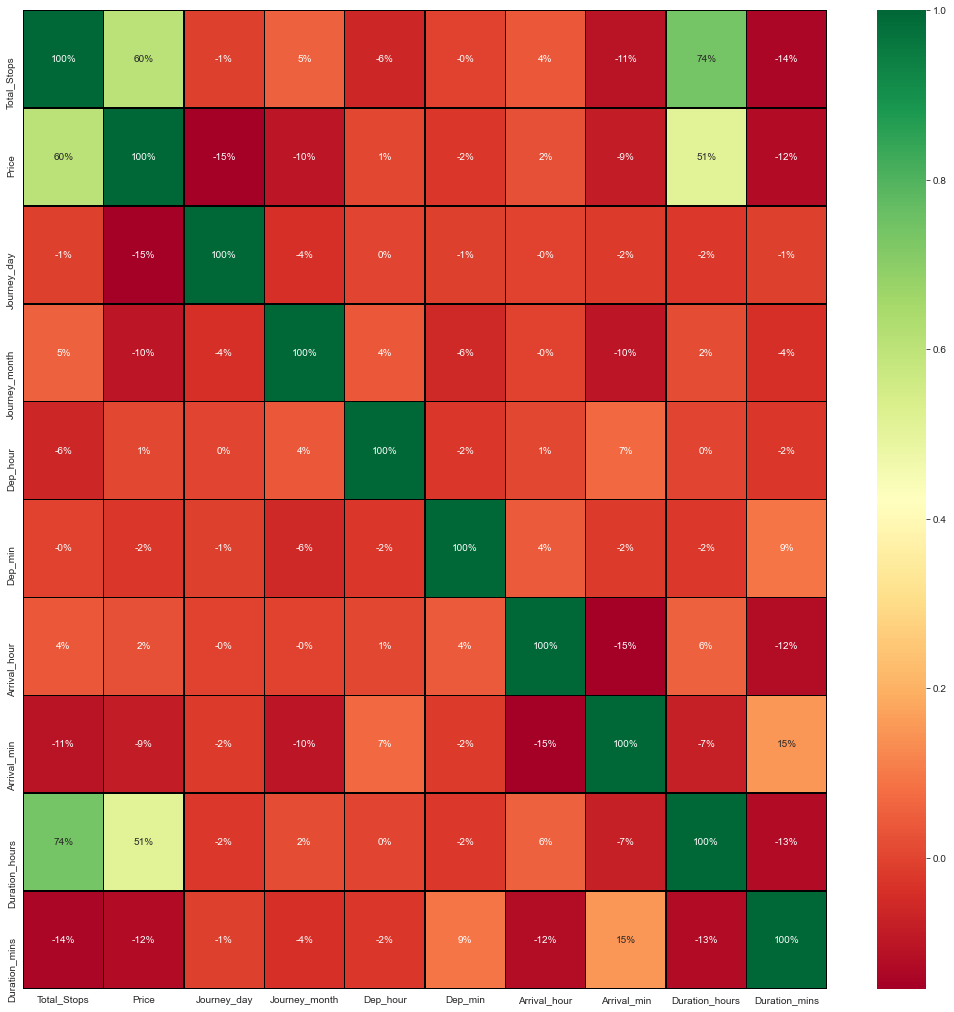

In [52]:
#Plotting heatmap for visualizing the correlation for initial train data
plt.figure(figsize=(18,18))
sns.heatmap(df_train.corr(),linewidth=0.5,linecolor='black',fmt='.0%',cmap='RdYlGn',annot=True)
plt.show()

1.There are more negative correlations present in the dataset

2.Highest positive correlated column has a value of 74%.

3.Highest negatively correlated column has a value of -15%

Text(0.5, 1.0, 'Correlation with Target variable')

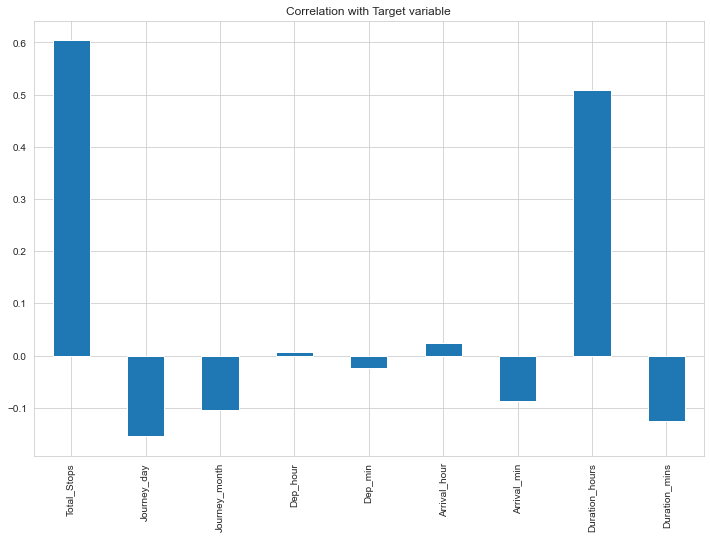

In [53]:
#Correlation with target variable
plt.figure(figsize=(12,8))
df_train.drop('Price',axis=1).corrwith(df_train['Price']).plot(kind='bar',grid=True)
plt.title('Correlation with Target variable')

We can observe that Total_Stops and Duration_hours columns are highly correlated with the target feature Price

## Feature Selection

In [54]:
dftrain.columns   #Checking out the columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [55]:
#Initializing for x data
x = dftrain.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()   #Independent variable

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
y = dftrain.iloc[:, 1]
y.head()   #Dependent variable

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [57]:
#Finding out important features using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [58]:
print(selection.feature_importances_)

[2.30091654e-01 1.42405407e-01 5.42482780e-02 2.37989694e-02
 2.16731992e-02 2.81631163e-02 1.90168466e-02 1.27948640e-01
 1.77967864e-02 1.09376977e-02 1.95365323e-03 1.75179292e-02
 1.33940690e-01 6.67694724e-02 1.93454698e-02 8.60581401e-04
 2.86311921e-03 1.14055767e-04 5.27474740e-03 7.55526018e-05
 5.96351274e-04 9.75478498e-03 3.25641874e-03 6.37507271e-03
 9.98823813e-03 1.34236734e-02 6.62304193e-03 4.38240551e-04
 2.47483132e-02]


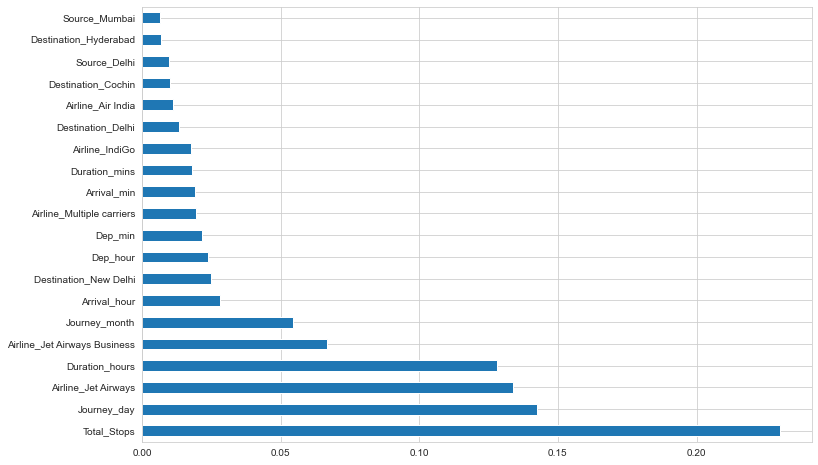

In [59]:
#Plotting graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Model Building

In [60]:
#Importing all the required libraries and metrics
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [61]:
#Finding the best random state
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 57 is 0.679792644911887


We can see that at random_state=57, the best r2_score is obtained so that we can create our train_test_split with this random state

In [62]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=.20)

### Finding the best performing model

In [63]:
LR=LinearRegression()
l=Lasso()
en=ElasticNet()
rd=Ridge()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()

In [64]:
models= []
models.append(('Linear Regression',LR))
models.append(('Lasso Regression',l))
models.append(('Elastic Net Regression',en))
models.append(('Ridge Regression',rd))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))
models.append(('RandomForestRegressor',rf))
models.append(('AdaBoostRegressor',ab))
models.append(('GradientBoostingRegressor',gb))

In [65]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
sd=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('r2_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=5,scoring='r2').std()
    print('Standard Deviation: ',std)
    sd.append(std)
    print('\n')
    MAE=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


r2_score:  0.679792644911887


cross_val_score:  0.6199027318916418


Standard Deviation:  0.01925785924706848


Mean Absolute Error:  1922.0567975374036


Mean Squared Error:  7071144.575344243


Root Mean Squared Error:  2659.1623822821057



****************************** Lasso Regression ***************************


Lasso()


r2_score:  0.6772484843955442


cross_val_score:  0.6196947873656187


Standard Deviation:  0.01874882062790624


Mean Absolute Error:  1919.6617023031151


Mean Squared Error:  7127327.316146655


Root Mean Squared Error:  2669.70547367058



****************************** Elastic Net Regression ***************************


ElasticNet()


r2_score:  0.40913438303210037


cross_val_score:  0.43257661620618737


Standard Deviation:  0.004006258608859791


Mean Absolute Error:  2379.1111857438705


Mean Squared Error:  13048095.666104497


Root Mean Squared Erro

In [66]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'r2_score': score, 'Cross_val_score':cvs, 'Standard_deviation':sd,
                    'Mean_absolute_error':mae, 'Mean_squared_error':mse, 'Root_Mean_Squared_error':rmse})
result

,Model,r2_score,Cross_val_score,Standard_deviation,Mean_absolute_error,Mean_squared_error,Root_Mean_Squared_error
0,Linear Regression,67.979264,61.990273,0.019258,1922.056798,7.071145e+06,2659.162382
1,Lasso Regression,67.724848,61.969479,0.018749,1919.661702,7.127327e+06,2669.705474
2,Elastic Net Regression,40.913438,43.257662,0.004006,2379.111186,1.304810e+07,3612.214787
3,Ridge Regression,66.341512,61.859228,0.016609,1932.823810,7.432810e+06,2726.318002
4,Decision Tree Regressor,75.477092,70.744575,0.033399,1342.269022,5.415398e+06,2327.100787
5,KNeighbors Regressor,60.451210,58.500093,0.022191,1801.290407,8.733566e+06,2955.260753
6,RandomForestRegressor,81.550813,81.272674,0.024623,1180.601180,4.074137e+06,2018.449184
7,AdaBoostRegressor,34.608473,26.468799,0.121553,3131.340363,1.444042e+07,3800.055560
8,GradientBoostingRegressor,80.599936,76.865783,0.014549,1495.940855,4.284120e+06,2069.811468


We can see that Random Forest Regressor is performing well compared to other algorithms.

In [67]:
#Predicting using Randomforest
y_pred = rf.predict(x_test)

In [68]:
#Score for train
rf.score(x_train, y_train)

0.9513947394703609

In [69]:
#Score for test
rf.score(x_test, y_test)

0.8155081324689353

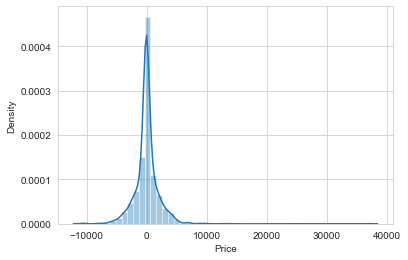

In [70]:
#Plotting distplot
sns.distplot(y_test - y_pred)
plt.show()

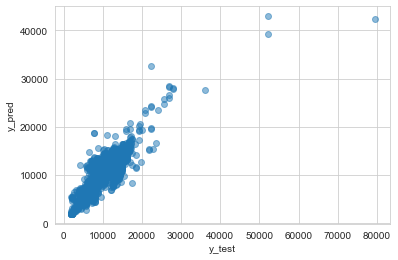

In [71]:
#Plotting scatterplot
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [72]:
#Finding r2_score
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.8155081324689353

Now we will perform Hyperparameter Tuning to improve our model and also boosting the scores too.

## Hyperparameter Tuning

- Choose following method for hyperparameter tuning

 -> RandomizedSearchCV --> Fast
 
 -> GridSearchCV
 
 
- Assign hyperparameters in form of dictionary


- Fit the model


- Check best paramters and best score

### RandomizedSearchCV

In [73]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [74]:
#Create the random grid
random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

In [75]:
#Random search of parameters, using 5 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [76]:
#Fitting the model
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [77]:
#Finding out the best parameters 
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [78]:
#Predicting using the tuned model
prediction = rf_random.predict(x_test)

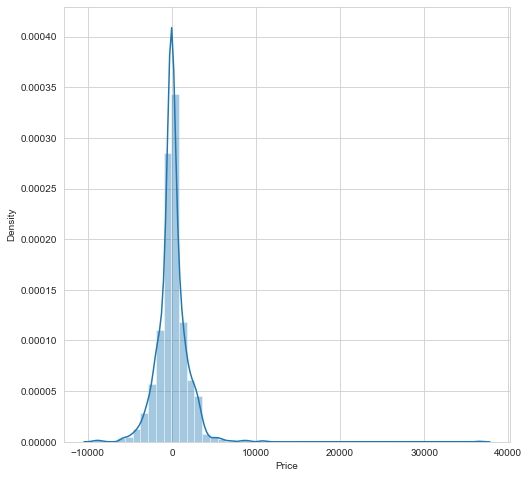

In [79]:
#Plotting the distplot
plt.figure(figsize = (8,8))
sns.distplot(y_test - prediction)
plt.show()

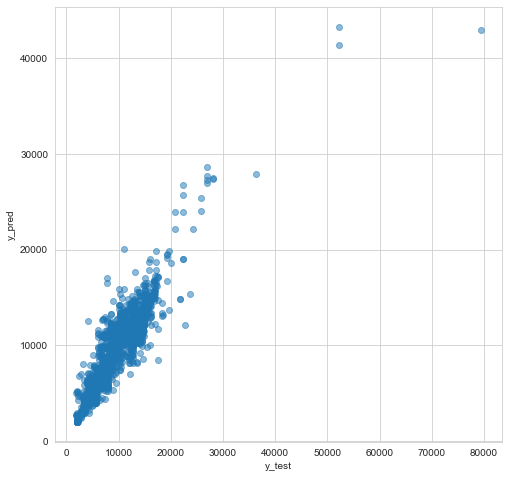

In [80]:
#Scatter plot
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [81]:
#Printing the finalized model with metrics scores
print('r2_score: ',r2_score(y_test,prediction)*100)
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,prediction))
print('Mean squared error: ',mean_squared_error(y_test,prediction))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,prediction))) 

r2_score:  84.13947181194892


Mean absolute error:  1137.3995829881424
Mean squared error:  3502483.1902493406
Root Mean squared error:  1871.4922362247032


After applying Hyperparameter Tuning using RandomizedSearchCV, we can observe that r2_score has been increased and also the error metrics has been reduced. Finally, we can save RandomForestRegressor as our best model.

# Saving the best model

In [82]:
import pickle
#Open a file, where you want to store the model data
file = open('flightprice_rf.pkl', 'wb')

#Dump information to that file
pickle.dump(rf_random, file)

In [83]:
#Loading the dumped model
model = open('flightprice_rf.pkl','rb')
forest = pickle.load(model)

In [84]:
y_prediction = forest.predict(x_test)  #Prediction

In [85]:
#Checking out the r2_score
metrics.r2_score(y_test, y_prediction)

0.8413947181194893